In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

In [4]:
# install OpenCV
!pip install opencv-python

# the usual ...
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/CavePainting.jpg') # READS IN NUMPY ARRAY

In [11]:
whos

Variable   Type       Data/Info
-------------------------------
cv2        module     <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
drive      module     <module 'google.colab.dri<...>s/google/colab/drive.py'>
gray       ndarray    453x676: 306228 elems, type `uint8`, 306228 bytes (299.05078125 kb)
h          int        453
img        ndarray    453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
img2       ndarray    453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
w          int        676


In [ ]:
# not in colab
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(453, 676, 3)


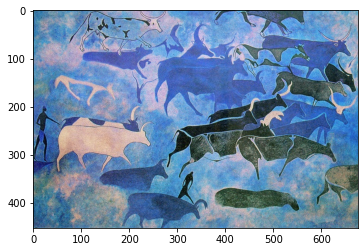

In [6]:
# display the image
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()
# what happened?

In [ ]:
# BGR <--> RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

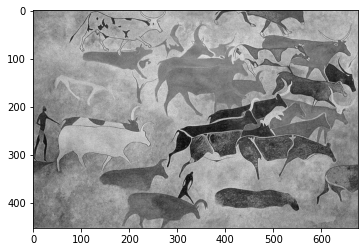

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [ ]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)

In [12]:
whos

Variable   Type       Data/Info
-------------------------------
cv2        module     <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
drive      module     <module 'google.colab.dri<...>s/google/colab/drive.py'>
gray       ndarray    453x676: 306228 elems, type `uint8`, 306228 bytes (299.05078125 kb)
h          int        453
img        ndarray    453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
img2       ndarray    453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
w          int        676


In [ ]:
# let's make a function
def imshowBGR2RGB( im ):
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  return

In [ ]:
imshowBGR2RGB(img)

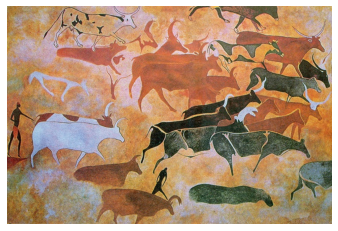

In [ ]:
# scaling 
rows, cols = img.shape[:2]
res = cv2.resize(img, (2*cols, 2*rows), interpolation = cv2.INTER_CUBIC)
imshowBGR2RGB(res)

In [ ]:
whos

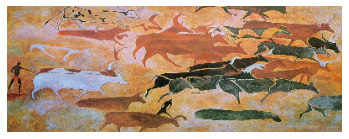

In [ ]:
# scaling 
res = cv2.resize(img,(400, 150), interpolation = cv2.INTER_CUBIC)
imshowBGR2RGB(res)

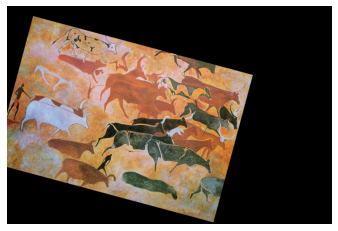

In [ ]:
# rotate (centre, angle, scale)
M = cv2.getRotationMatrix2D((100, 120), -15, .7)
dst = cv2.warpAffine(img, M, (cols,rows))
imshowBGR2RGB(dst)

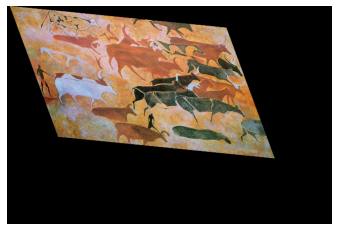

In [ ]:
# affine transformation
pts1 = np.float32([[5,5],[5,50],[50,5]])
pts2 = np.float32([[10,3],[20,30],[40,6]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

imshowBGR2RGB(dst)

In [ ]:
# perspective transformation

# getPerspectiveTransform

# how many point matches do we need?

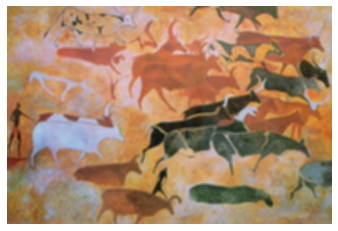

In [ ]:
# averaging

kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

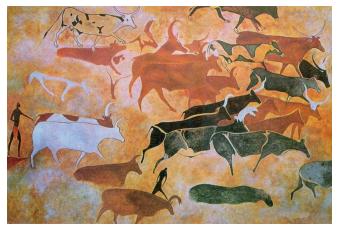

In [ ]:
# compare with the original
imshowBGR2RGB(img)

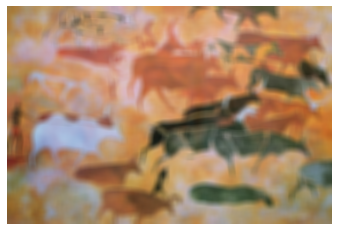

In [ ]:
# larger window
kernel = np.ones((15,15),np.float32)/225
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

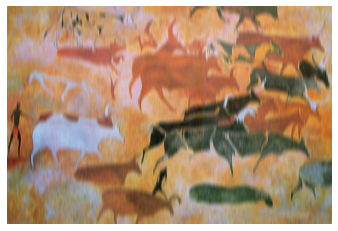

In [ ]:
# Gaussian blur
kernel = cv2.getGaussianKernel(15, 5)

dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

# alternative: GaussianBlur(img,(15,15),20) 

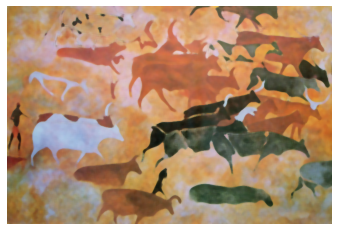

In [ ]:
median = cv2.medianBlur(img, 7)
imshowBGR2RGB(median)

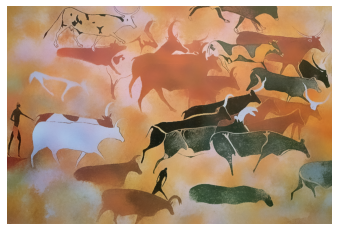

In [ ]:
blur = cv2.bilateralFilter(img,30,75,75)
imshowBGR2RGB(blur)

(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

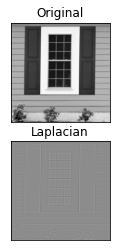

In [ ]:
# image gradients
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/window.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
#imshowBGR2RGB(laplacian)


plt.subplot(2,1,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

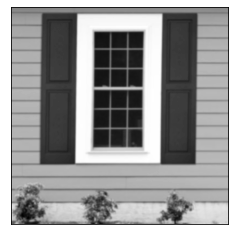

In [ ]:
#median = cv2.medianBlur(gray, 5)
blur = cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(blur, cmap = 'gray')
plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

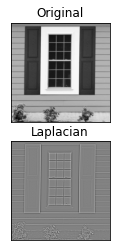

In [ ]:
# smooth first

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

plt.subplot(2,1,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

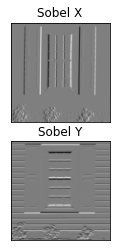

In [ ]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(2,1,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


[[  0.  66.  78. ... 106.  94.   0.]
 [ 34. 100. 106. ... 128. 110.  16.]
 [ 92. 164. 158. ... 158. 152.  64.]
 ...
 [ 10. 452. 522. ... 196.  48.  50.]
 [122. 564. 444. ... 138.  16.  14.]
 [  0. 528. 480. ...  56.  20.   0.]]


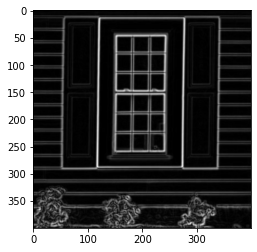

In [ ]:
grad_mag = abs(sobelx**1) + abs(sobely**1); # gradient magnitude
print(grad_mag)
plt.imshow(grad_mag,cmap='gray')

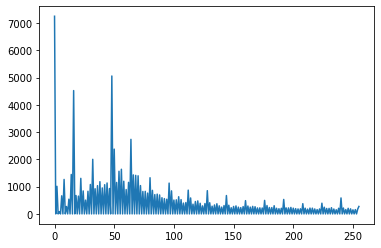

In [ ]:
hist,bins = np.histogram(grad_mag,256,[0,256])
plt.plot(hist)

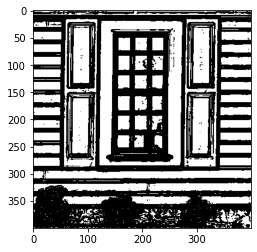

In [ ]:
th = grad_mag < 150
plt.imshow(th, cmap='gray')

In [ ]:
# edges (Canny)
edges = cv2.Canny(gray, 75, 100)

plt.subplot(1, 2, 1),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2, 2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [ ]:
lowres = cv2.pyrDown(img)
lowres = cv2.pyrDown(lowres)
lowres = cv2.pyrDown(lowres)
imshowBGR2RGB(lowres)

In [ ]:
highres = cv2.pyrUp(lowres)
highres = cv2.pyrUp(highres)
highres = cv2.pyrUp(highres)
imshowBGR2RGB(highres)

**more:** [OpenCV-Python Tutorials](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


In [ ]:
import numpy as np
b=np.array([[1,2,3], [4,5,6]]) 
#both kind of indexing ways are ok
print(b[1,2])
print(b[1][2])


def getPixelValue1(padded_img, filter, i, j):
    f_h, f_w = filter.shape
    summed = 0
    for k in range(f_h):
        n_j = j
        for l in range(f_w):
            summed = summed + (filter[k][l] * padded_img[i][n_j])
            n_j = n_j + 1
        i = i + 1
	return summed

6
6


In [ ]:
print(2//5
      )

0
